In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing the Required Libraries

In [36]:
# import all the necessary libraries here
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Importing the data into a pandas dataframe

In [37]:
df = pd.read_csv('/content/drive/MyDrive/asssign1/dataset/linear-regression.csv')
print(df.shape)

(1599, 12)


Viewing the First 10 samples of the data

In [38]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


Splitting the data frame into Features and output targets in numpy array format

In [39]:
x_train=np.array(df.iloc[:,:11])
y_train=np.array(df.iloc[:,11])


Shape of input features:

*   Total number of samples :1599
*   Total number of Features : 11





In [40]:
x_train.shape

(1599, 11)

In [41]:
x_train

array([[ 7.4  ,  0.7  ,  0.   , ...,  3.51 ,  0.56 ,  9.4  ],
       [ 7.8  ,  0.88 ,  0.   , ...,  3.2  ,  0.68 ,  9.8  ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  3.26 ,  0.65 ,  9.8  ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  3.42 ,  0.75 , 11.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  3.57 ,  0.71 , 10.2  ],
       [ 6.   ,  0.31 ,  0.47 , ...,  3.39 ,  0.66 , 11.   ]])

Shape of output target:

*  total number of samples :1599


In [42]:
y_train.shape

(1599,)

In [43]:
y_train

array([5, 5, 5, ..., 6, 5, 6])

Function for Normalising the data

In [44]:
def normalise(x):
  mean = np.mean(x,axis=0)
  sigma = np.std(x,axis=0)
  x = (x-mean)/sigma
  return x

Normalising the data

In [45]:
x_train = normalise(x_train)
x_train

array([[-0.52835961,  0.96187667, -1.39147228, ...,  1.28864292,
        -0.57920652, -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228, ..., -0.7199333 ,
         0.1289504 , -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.33117661,
        -0.04808883, -0.58477711],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.70550789,
         0.54204194,  0.54162988],
       [-1.39015528,  0.65462046, -0.77526673, ...,  1.6773996 ,
         0.30598963, -0.20930812],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.51112954,
         0.01092425,  0.54162988]])

Splitting the data into training ,validation and test datasets

In [46]:
X_train_temp, X_test, y_train_temp, y_test = train_test_split(x_train, y_train, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.375)

In [47]:
a=X_train.shape
b=X_val.shape
c=X_test.shape
print("The size of train data is ",a)
print("The size of validation data is ",b)
print("The size of test data is ",c)

The size of train data is  (799, 11)
The size of validation data is  (480, 11)
The size of test data is  (320, 11)


In [48]:
y_train = y_train.reshape(-1,1)
y_val = y_val.reshape(-1,1)
y_test = y_test.reshape(-1,1)
a=y_train.shape
b=y_val.shape
c=y_test.shape
print("The size of train data is ",a)
print("The size of validation data is ",b)
print("The size of test data is ",c)


The size of train data is  (799, 1)
The size of validation data is  (480, 1)
The size of test data is  (320, 1)


#Analytical Solution

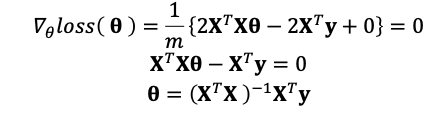

In [49]:
def analytic_loss(x,y):
   m = x.shape[0]
   ones = np.ones((m,1))
   x = np.concatenate((ones,x),axis = 1)
   X_T = np.transpose(x)
   X = np.dot(X_T,x)
   X_in = np.linalg.inv(X)
   X = np.dot(X_in,X_T)
   theta = np.dot(X,y)
   return theta


In [50]:
theta = analytic_loss(X_train,y_train)

In [51]:
theta.shape

(12, 1)

The weights matrix output from the analytical Solution

In [52]:
theta

array([[ 5.63819004e+00],
       [-3.52271327e-03],
       [-2.00133198e-01],
       [-2.73095156e-02],
       [-3.25156932e-02],
       [-9.99244722e-02],
       [ 3.58023974e-02],
       [-9.82644111e-02],
       [ 9.46599987e-03],
       [-1.07625868e-01],
       [ 1.69440993e-01],
       [ 2.98520108e-01]])

Predicting the output on test dataset



In [53]:
m = X_test.shape[0]
ones = np.ones((m,1))
x_test = np.concatenate((ones,X_test),axis = 1)
y_predict = np.dot(x_test,theta)
y_predict

array([[5.66567169],
       [5.11864488],
       [6.29262611],
       [5.00248708],
       [5.39261867],
       [5.94199932],
       [6.34748384],
       [5.87194626],
       [5.88442178],
       [5.69378422],
       [6.12523024],
       [5.62055166],
       [6.19240448],
       [5.6085237 ],
       [5.72300484],
       [5.88480206],
       [5.09231801],
       [5.68240336],
       [6.6079853 ],
       [5.8675458 ],
       [6.71805058],
       [5.27215404],
       [5.41175769],
       [5.89672058],
       [5.42121476],
       [4.76146648],
       [4.72128951],
       [5.62551194],
       [5.6110289 ],
       [5.53140011],
       [6.11192262],
       [6.17663886],
       [5.00020301],
       [6.02486055],
       [5.63277945],
       [5.77099536],
       [6.00648693],
       [6.47400818],
       [5.67054755],
       [5.64692879],
       [6.20199545],
       [5.63277945],
       [5.26016973],
       [5.40021243],
       [5.03857803],
       [5.96432348],
       [5.08684261],
       [6.141

In [54]:
y_predict.shape

(320, 1)

Defining R_square Score
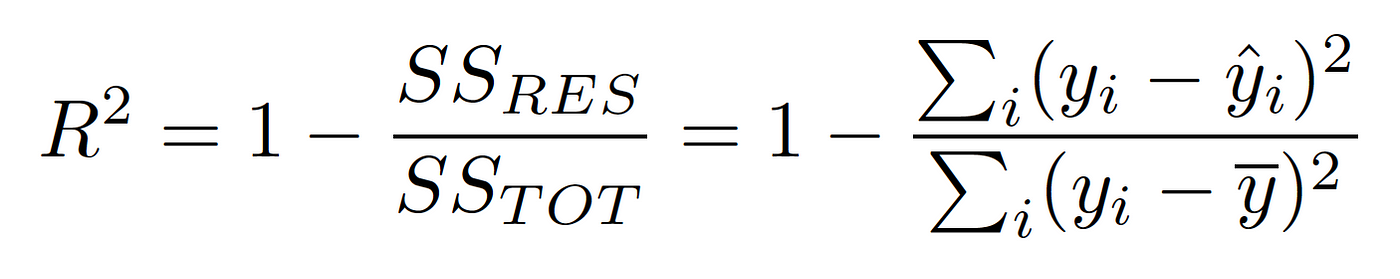

In [55]:
def R_square_score(y_pred,y_true):
  mean_y_true = np.mean(y_true)
  ss_res = np.sum((y_true - y_pred) ** 2)
  ss_tot = np.sum((y_true - mean_y_true) ** 2)
  score = 1 - (ss_res / ss_tot)
  return score


Defining R_mean_score
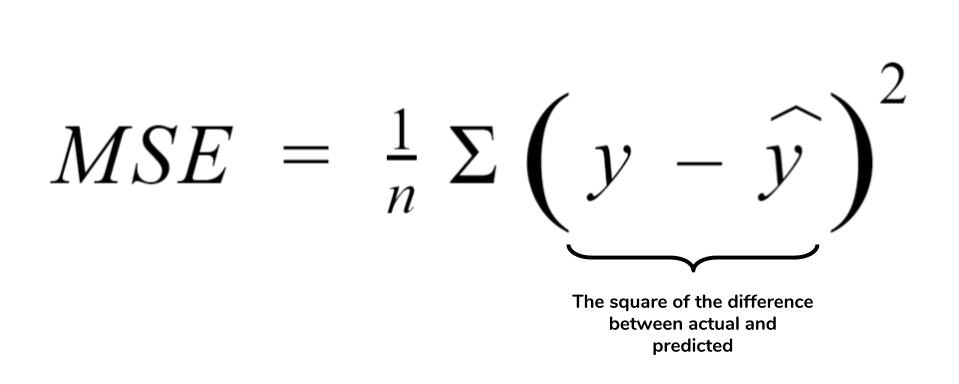

In [56]:
def R_mean_score(y_pred,y_true):
   squared_errors = (y_true - y_pred) ** 2
   mse = np.mean(squared_errors)
   rmse = np.sqrt(mse)
   return rmse

Predicting the R_sqaure_Score and R_mean_score on the test dataset

In [57]:
r_score = R_square_score(y_predict,y_test)
rmse = R_mean_score(y_predict,y_test)
print("R_squared Score :",r_score)
print("RMSE Score :",rmse )

R_squared Score : 0.3165169134958715
RMSE Score : 0.6690850073202116


Loss function for iterative Model

In [58]:
def MSE(x,y,w,b):
    m=x.shape[0]
    cost=0.00
    for i in range(m):
        f=np.dot(x[i],w)+b
        cost =cost+(f-y[i])**2
    cost=cost/(2*m)
    return cost

Calculation of Gradient of weights and bias




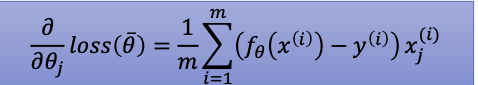

In [59]:
def gradient(x,y,w,b):
    m,n=x.shape
    dj_dw=np.zeros((n,1))
    dj_db=0
    for i in range(m):
        val=np.dot(x[i],w)+b -y[i]
        for j in range(n):
            dj_dw[j]=dj_dw[j]+val*x[i,j]
        dj_db=dj_db+val
    dj_db=dj_db/m
    dj_dw=dj_dw/m
    return dj_dw,dj_db

implementing the gradient_descent Algorithm

In [60]:
def gradient_descent(x,y,x_val,y_val,w_in,b_in,cost,gradient,alpha,num):
    losses_train=[]
    losses_valid=[]
    w=w_in
    b=b_in
    for i in range(num):
        dj_dw,dj_db=gradient(x,y,w,b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        loss = cost(x, y, w, b)
        losses_train.append(loss)
        y_pred = np.dot(x_val,w) + b
        r_score = R_square_score(y_pred,y_val)
        rmse = R_mean_score(y_pred,y_val)
        loss = cost(x_val,y_val,w,b)
        losses_valid.append(loss)
        print("validation loss : ",loss ,"validation R_Score :",r_score,"validation RMSE Score:",rmse)

    return w,b,losses_train,losses_valid

Initilaising the weights and bias and applying  gradient descent to optimize the MSE LOSS

In [61]:
initial_w = np.zeros((11,1))
initial_b = 0

num=10000
alpha = 0.01
w_final,b_final,loss_train,loss_valid = gradient_descent(X_train,y_train,X_val,y_val,initial_w,initial_b,MSE,gradient,alpha,num)

Streaming output truncated to the last 5000 lines.
validation loss :  [0.19596745] validation R_Score : 0.38912624412729113 validation RMSE Score: 0.6260470468713881
validation loss :  [0.19596748] validation R_Score : 0.3891261735658652 validation RMSE Score: 0.6260470830284259
validation loss :  [0.1959675] validation R_Score : 0.3891261030432137 validation RMSE Score: 0.626047119165593
validation loss :  [0.19596752] validation R_Score : 0.3891260325593183 validation RMSE Score: 0.6260471552828984
validation loss :  [0.19596754] validation R_Score : 0.38912596211416106 validation RMSE Score: 0.6260471913803518
validation loss :  [0.19596757] validation R_Score : 0.3891258917077237 validation RMSE Score: 0.6260472274579623
validation loss :  [0.19596759] validation R_Score : 0.38912582133998797 validation RMSE Score: 0.626047263515739
validation loss :  [0.19596761] validation R_Score : 0.38912575101093594 validation RMSE Score: 0.6260472995536915
validation loss :  [0.19596763] vali

Training Loss Plot ,α=0.01

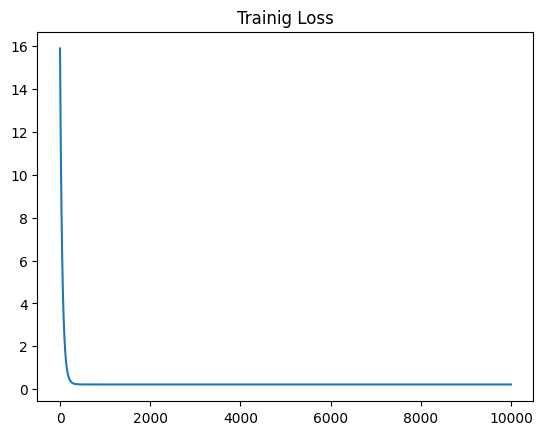

In [62]:
plt.title("Trainig Loss")
plt.plot(loss_train)


Validation Loss Plot ,α=0.01

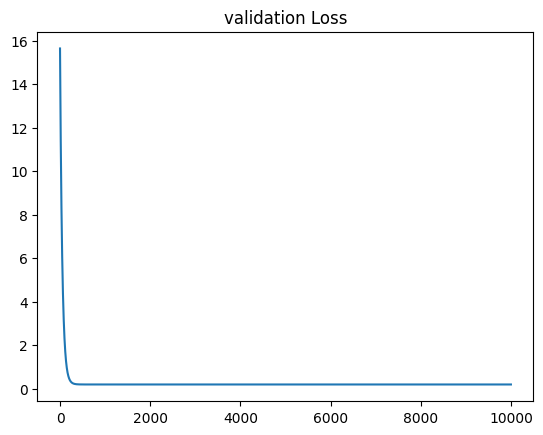

In [63]:
plt.title("validation Loss")
plt.plot(loss_valid)

In [64]:
y_predict = np.dot(X_test,w_final)+b_final

r_score = R_square_score(y_predict,y_test)
rmse = R_mean_score(y_predict,y_test)
print("alpha=0.01,epochs=10000")
print("R_squared Score :",r_score)
print("RMSE Score :",rmse )

alpha=0.01,epochs=10000
R_squared Score : 0.31653336482678773
RMSE Score : 0.6690769548860541


In [65]:
initial_w = np.zeros((11,1))
initial_b = 0

num=10000
alpha = 0.001
w_final,b_final,loss_train,loss_valid = gradient_descent(X_train,y_train,X_val,y_val,initial_w,initial_b,MSE,gradient,alpha,num)

Streaming output truncated to the last 5000 lines.
validation loss :  [0.19697143] validation R_Score : 0.38599660990058016 validation RMSE Score: 0.6276486832000967
validation loss :  [0.19696979] validation R_Score : 0.38600174156370726 validation RMSE Score: 0.6276460603413421
validation loss :  [0.19696815] validation R_Score : 0.3860068635970163 validation RMSE Score: 0.6276434423935809
validation loss :  [0.19696651] validation R_Score : 0.38601197601945836 validation RMSE Score: 0.6276408293471886
validation loss :  [0.19696487] validation R_Score : 0.3860170788499464 validation RMSE Score: 0.6276382211925594
validation loss :  [0.19696323] validation R_Score : 0.38602217210735656 validation RMSE Score: 0.6276356179201062
validation loss :  [0.1969616] validation R_Score : 0.3860272558105279 validation RMSE Score: 0.6276330195202611
validation loss :  [0.19695998] validation R_Score : 0.3860323299782621 validation RMSE Score: 0.627630425983474
validation loss :  [0.19695835] val

Training Loss Plot ,α=0.001

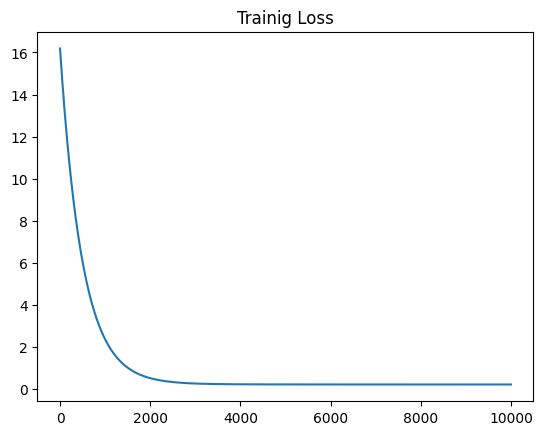

In [66]:
plt.title("Trainig Loss")
plt.plot(loss_train)


Validation  Loss Plot ,α=0.001

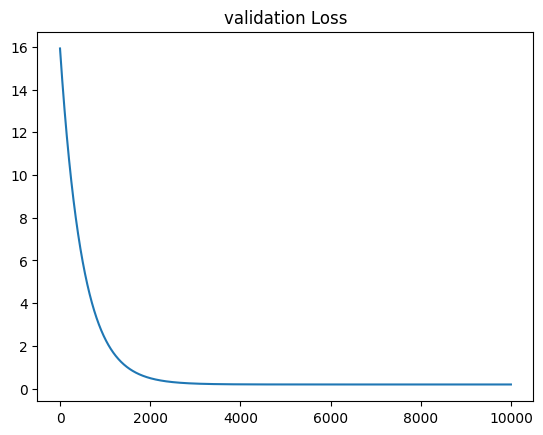

In [67]:
plt.title("validation Loss")
plt.plot(loss_valid)

In [68]:
y_predict = np.dot(X_test,w_final)+b_final

r_score = R_square_score(y_predict,y_test)
rmse = R_mean_score(y_predict,y_test)
print("alpha=0.001,epochs=10000")
print("R_squared Score :",r_score)
print("RMSE Score :",rmse )

alpha=0.001,epochs=10000
R_squared Score : 0.3198079032461947
RMSE Score : 0.6674722322859563


In [74]:
initial_w = np.zeros((11,1))
initial_b = 0

num=50000
alpha = 0.0001
w_final,b_final,loss_train,loss_valid = gradient_descent(X_train,y_train,X_val,y_val,initial_w,initial_b,MSE,gradient,alpha,num)

Streaming output truncated to the last 5000 lines.
validation loss :  [0.19835831] validation R_Score : 0.3816734076157823 validation RMSE Score: 0.6298544467572221
validation loss :  [0.19835788] validation R_Score : 0.3816747494776447 validation RMSE Score: 0.6298537633173298
validation loss :  [0.19835745] validation R_Score : 0.38167609107988265 validation RMSE Score: 0.6298530800089285
validation loss :  [0.19835702] validation R_Score : 0.38167743242254737 validation RMSE Score: 0.6298523968319927
validation loss :  [0.19835659] validation R_Score : 0.3816787735056898 validation RMSE Score: 0.6298517137864967
validation loss :  [0.19835616] validation R_Score : 0.3816801143293612 validation RMSE Score: 0.629851030872415
validation loss :  [0.19835573] validation R_Score : 0.3816814548936126 validation RMSE Score: 0.6298503480897221
validation loss :  [0.1983553] validation R_Score : 0.38168279519849513 validation RMSE Score: 0.629849665438392
validation loss :  [0.19835487] valid

Training Loss Plot ,α=0.0001

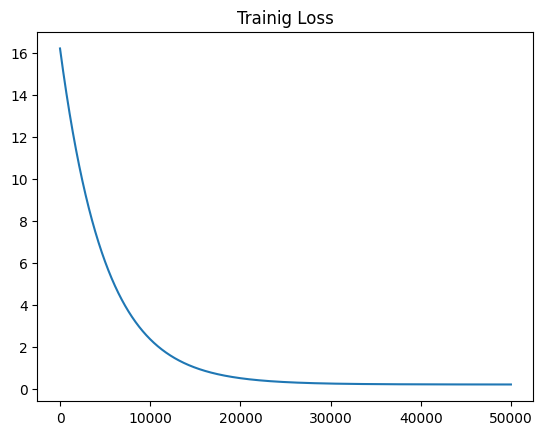

In [75]:
plt.title("Trainig Loss")
plt.plot(loss_train)


Validation Loss Plot ,α=0.0001

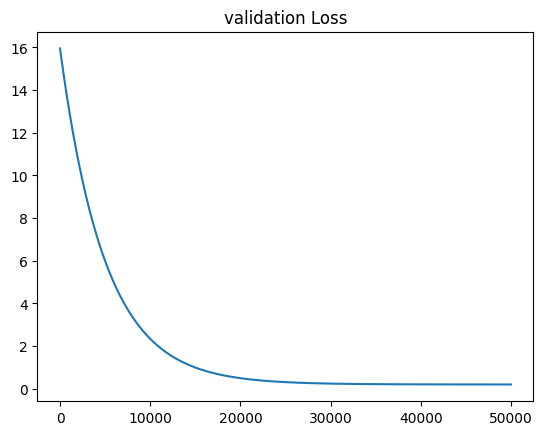

In [76]:
plt.title("validation Loss")
plt.plot(loss_valid)

In [78]:
y_predict = np.dot(X_test,w_final)+b_final

r_score = R_square_score(y_predict,y_test)
rmse = R_mean_score(y_predict,y_test)
print("alpha=0.0001,epochs=50000")
print("R_squared Score :",r_score)
print("RMSE Score :",rmse )

alpha=0.0001,epochs=50000
R_squared Score : 0.3002813312430981
RMSE Score : 0.6769851511264086
